In [150]:
import pandas as pd
import os 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO
import gspread
from oauth2client.service_account import ServiceAccountCredentials

-------------------------------------------------------------------------------------------------------------------------------
                                             ОБРАЗЕЦ ВЫГРУЗКИ ДАННЫХ С ЯНДЕКС API
-------------------------------------------------------------------------------------------------------------------------------
url = 'http://***?'
data = []

for date in dates:
    params['filters'] = f"ym:s:date=='{date}'"
    visits_request = requests.get(url, params=params).json()
    
    for row in visits_request['data']:
        dim = row['dimensions'][0]
        dim['date'] = date
        dim['metrics'] = row['metrics'][0]
        data.append(dim)

в этом образце представлен скрипт для одгрузки данных из яндекс API\
где в переменную url мы положим ссылку на наши данные в яндекс метрике
эту ссылку мы будем использовать как основную, и к ней метод requests будет дописывать
параметры уже самостоятельно
и создадим пустой список, для того что бы по каждому дню записывать
результаты запроса
теперь разберёмся с запросами по датам
скажем питону for data in dates: что означает для каждого значения data применить 
записаить в переменную dates
далее применим переменную params где в скобки положим параметр ['filtres']
в этом параметре можно указывать как диапазон дат, либо указать каждую дату отдельно
как мы сделали в данном примере
при этом в наш словарь params мы переписываем каждую дату, по ключу ['filtres']
который добавляет дополнительное ограничение f"ym:s:date=='{date}'" и говорит о том
что нам необходимо запросить только дату date=={date} которую мы сейчас обрабатываем
далее при помощи библиотеки requests передаём запрос url и указываем необходимые
параметры params=params и говорим что нас интересует только результат в формате .json()
просто для того, что бы удобно доставать все наши данные


а в visits_request есть возвращаемое значение нашего запроса по ключу ['data']
в ней хранится некоторый набор данных который нам возвращается 
[('dimensions': (t'name's 'People!
ne
'date": 2021-11-06%
*** **,0519
"'metrics: ***,
*
нам необходимо достать то, что лежит по ключу data и это и будет результатом
за запрашиваемый день 
мы можем заметить что внутри словаря [('dimensions лежат нужные нам значения
которые нам нужно в следствии достать это id, date, metrics
по этому for in для каждого элемента из списка по ключу ['data']
мы будем доставать сначала ключ 'dimensions' потом уже из
него будем брать нулевой [0] элемент из списка по ключу
для того, что бы получить доступ к типу пользователя, дате и метрике 
так как это словарь [('dimensions': (t'name's 'People!
                                    ne
                                    'date": 2021-11-06%
                                     ****,**
                                    "'metrics: ***.*,
мы можем в него дополнительно писать какие-либо ключи
сейчас мы сохранили его в переменную dim
порой яндекс метрика не возвращает дату, по этому мы пропишем ключ
что dim['date'] равен date - ключу запроса
и метрика тоже не всегда возвращается в 'dimensions'
она записана отдельно, по этому мы так же явно пропишем дополнительно
ключ dim['metrics'] равен ['metrics'] и добавим то, что нам возвращается по ключу ['metrics']
и возьмём нулевой элемент [0]

Для начала, давайте посмотрим на распределение посещений сайта по дням. Постройте график с распределением количества посещений от ботов и обычных пользователей сайта Яндекс.Метрика.

In [84]:
dates = [date.strftime('%Y-%m-%d') for date in pd.date_range(start='2021-11-01', end='2021-11-06')]

In [85]:
params = {'metrics': 'ym:s:visits',
         'dimensions': 'ym:s:date',
         'dimensions': 'ym:s:isRobot',
         'id': '***'}

In [86]:
data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/step_1_lesson_7.csv')

In [87]:
data.dtypes

date          object
user_type     object
visits       float64
dtype: object

In [88]:
data

,date,user_type,visits
0,2020-06-15,People,417.0
1,2020-06-15,Robots,177.0
2,2020-06-16,People,472.0
3,2020-06-16,Robots,91.0
4,2020-06-17,People,475.0
5,2020-06-17,Robots,138.0


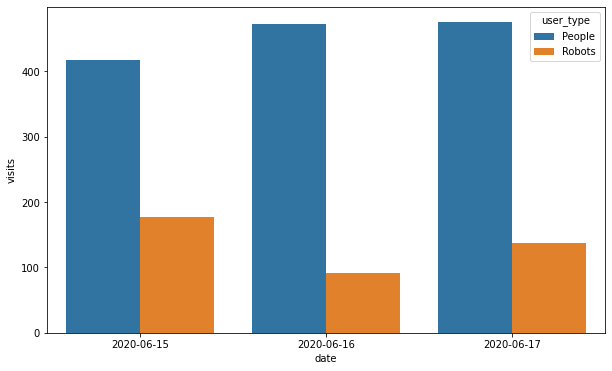

In [89]:
fig, ax=plt.subplots(figsize=(10,6))
sns.barplot(data=data, x='date', y='visits', hue='user_type', ax=ax)

In [90]:
data_2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-i-karamnov-39/step_2_lesson_7.csv')

In [91]:
data_2

,date,browser,visits
0,2020-06-15,Google Chrome,354.0
1,2020-06-15,Firefox,58.0
2,2020-06-15,Yandex Browser,54.0
3,2020-06-15,Safari,41.0
4,2020-06-15,Chrome Mobile,31.0
5,2020-06-15,Opera,16.0
6,2020-06-15,Mobile Safari,16.0
7,2020-06-15,Samsung Internet,9.0
8,2020-06-15,Edge,5.0
9,2020-06-15,UCWEB,4.0


In [92]:
data_2.loc[data_2.browser == 'Google Chrome'].visits.iloc[0]

354.0

In [93]:
data_2_loc = data_2.loc[data_2.browser == 'Google Chrome']['visits'].iloc[0] / data_2.visits.sum() * 100

In [94]:
data_2_loc.round()

60.0

Давайте выясним, с какого браузера приходит больше всего ботов. Посмотрите на данные и определите, у какого браузера самая большая доля посещений сайта ботами от общего числа посещений в этом браузере?
- **Как решать это задание?**
    
    Сгруппируйте данные по браузерам и для каждого типа посчитайте сумму посещений (то есть все посещения, осуществлённые с этого браузера). Далее смёрджите этот датафрэйм с исходным по колонке с типом браузера. После этого разделите число посещений, разделённое по типу пользователя, на число посещений с этого браузера. То есть получите долю посещений от роботов и людей для каждого браузера. Потом возьмите браузер с максимальной долей
    
- **Как делать джойн**
    
    Для применения джойна по колонкам 2-ух датафрэймов используйте метод `merge`. Он принимает 2-ой датафрэйм. Также можно указать по какой колонке объединять и как. Например,
    
    ```sql
    df.merge(other_df, on='same_column', how='inner')
    ```
    
    Где
    
    `other_df` - другой датафрэйм
    
    `on` - параметр, принимающий название общей колонки в 2-ух дф, по которой нужно объединять
    
    `how` - параметр, принимающий тип джойна
    
    То есть тут мы объединили `df` с `other_df` по колонке `same_column` иннер джойном
    
- **У меня не принимается ответ!**
    
    Обратите внимание на следующий факт: в данных есть такой браузер, в который ходят **только боты**. Проверьте, что вы его не потеряли 🙂


In [95]:
data_3 = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_3_lesson_7.csv')

In [96]:
data_3.head(5)

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0


In [97]:
data_3.nunique()

date          1
browser      15
user_type     2
visits       14
dtype: int64

In [98]:
vizits_a = data_3.groupby(['browser', 'user_type']).visits.sum()

In [99]:
vizits_a.head()

browser          user_type
Android Browser  People        1.0
Chrome Mobile    People       31.0
Chromium         People        1.0
                 Robots        1.0
CocCoc           People        1.0
Name: visits, dtype: float64

In [100]:
vizits_b = data_3.groupby(['browser']).visits.sum()

In [101]:
vizits_b.head(5)

browser
Android Browser     1.0
Chrome Mobile      31.0
Chromium            2.0
CocCoc              1.0
Edge                5.0
Name: visits, dtype: float64

In [102]:
seires = vizits_a / vizits_b

In [103]:
seires

browser             user_type
Android Browser     People       1.000000
Chrome Mobile       People       1.000000
Chromium            People       0.500000
                    Robots       0.500000
CocCoc              People       1.000000
Edge                People       0.800000
                    Robots       0.200000
Firefox             People       0.465517
                    Robots       0.534483
Google Chrome       People       0.706215
                    Robots       0.293785
Mobile Safari       People       0.937500
                    Robots       0.062500
Opera               People       0.687500
                    Robots       0.312500
Safari              People       0.463415
                    Robots       0.536585
Samsung Internet    People       0.888889
                    Robots       0.111111
UCWEB               Robots       1.000000
Vivaldi             People       1.000000
Yandex Browser      People       0.870370
                    Robots       0.129630
Yand

In [134]:
seires.loc[:, 'Robots'].sort_values(ascending = False)

browser
UCWEB               1.000000
Safari              0.536585
Firefox             0.534483
Chromium            0.500000
Opera               0.312500
Google Chrome       0.293785
Edge                0.200000
Yandex Browser      0.129630
Samsung Internet    0.111111
Mobile Safari       0.062500
Name: visits, dtype: float64

Выгрузите данные, содержащие информацию о дне, типе пользователя, браузере. Создайте колонку с метрикой доли заходов на сайт для каждого из этих разрезов.

В ответе укажите процент открытий сайта настоящими пользователями Safari (не ботами) с точностью до 1 знака после точки.

Hint: обратите внимание, здесь вам нужно найти долю заходов конкретных типов пользователей с конкретного браузера от вообще всех-всех заходов на сайт за этот день.
- **Как решать это задание?**
    
    Посчитайте процент пользователей в каждой из групп (комбинация браузера и типа пользователей), округлите до 1 знака и укажите процент пользователей-людей с браузером Safari
    
- **Как посчитать процент?**
    
    Разделите колонку на сумму по этой же колонке, а затем умножьте на 100
    
- **У меня не принимается ответ!**
    
    Первая часть этого задания с добычей данных из метрики не проверяется - примените свой код к данным, доступным из задания по ссылке

In [138]:
df_4 = pd.read_csv('https://stepik.org/media/attachments/lesson/361618/step_4_lesson_7.csv')

In [139]:
df_4

,date,browser,user_type,visits
0,2020-06-15,Google Chrome,People,250.0
1,2020-06-15,Google Chrome,Robots,104.0
2,2020-06-15,Yandex Browser,People,47.0
3,2020-06-15,Firefox,Robots,31.0
4,2020-06-15,Chrome Mobile,People,31.0
5,2020-06-15,Firefox,People,27.0
6,2020-06-15,Safari,Robots,22.0
7,2020-06-15,Safari,People,19.0
8,2020-06-15,Mobile Safari,People,15.0
9,2020-06-15,Opera,People,11.0


In [141]:
df_4['all_vizit'] = df_4.visits.sum()

In [142]:
df_4['perc'] = df_4['visits'] / df_4['all_vizit'] * 100

In [143]:
df_4

,date,browser,user_type,visits,all_vizit,perc
0,2020-06-15,Google Chrome,People,250.0,594.0,42.087542
1,2020-06-15,Google Chrome,Robots,104.0,594.0,17.508418
2,2020-06-15,Yandex Browser,People,47.0,594.0,7.912458
3,2020-06-15,Firefox,Robots,31.0,594.0,5.218855
4,2020-06-15,Chrome Mobile,People,31.0,594.0,5.218855
5,2020-06-15,Firefox,People,27.0,594.0,4.545455
6,2020-06-15,Safari,Robots,22.0,594.0,3.703704
7,2020-06-15,Safari,People,19.0,594.0,3.198653
8,2020-06-15,Mobile Safari,People,15.0,594.0,2.525253
9,2020-06-15,Opera,People,11.0,594.0,1.851852


In [147]:
bs = df_4.query("user_type == 'People' & browser == 'Safari'")

In [148]:
bs

,date,browser,user_type,visits,all_vizit,perc
7,2020-06-15,Safari,People,19.0,594.0,3.198653


In [149]:
bs.round(1)

,date,browser,user_type,visits,all_vizit,perc
7,2020-06-15,Safari,People,19.0,594.0,3.2


In [151]:
scope = ['https://***',
         'https://***']
my_mail = '***'

credentials = ServiceAccountCredentials.from_json_keyfile_name('/mnt/***/home-jupyter/jupyter-i-karamnov-39/xrustproject-277863c5a5e8.json', scope)
gs = gspread.authorize(credentials)

In [152]:
SERVISE_ACCOUNT_FILE = '/mnt/***/home-jupyter/jupyter-i-karamnov-39/xrustproject-277863c5a5e8.json'

In [153]:
gc = gspread.service_account(filename=SERVISE_ACCOUNT_FILE)

In [154]:
sh = gc.create('project_7_4')

In [155]:
sh.share('***', perm_type='user', role='writer')

In [156]:
worksheet = sh.get_worksheet(0)

In [157]:
worksheet.update([data.columns.values.tolist()] + data.values.tolist())

{'spreadsheetId': '1DS3BfP4BNfx31wmQ4MSepyqL0wQ536lpnuDPZv7l9NU',
 'updatedRange': 'Sheet1!A1:C7',
 'updatedRows': 7,
 'updatedColumns': 3,
 'updatedCells': 21}

In [158]:
link = sh.url

In [159]:
link

'https://docs.google.com/spreadsheets/d/1DS3BfP4BNfx31wmQ4MSepyqL0wQ536lpnuDPZv7l9NU'